## IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING AND READING THE DATASET

In [3]:
car=pd.read_excel(r"C:\hello world\new work 03-01-24\car crash\new dataset.xlsx\new dataset.xlsx")
car.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [4]:
df=car.copy()

## ABOUT THE DATASET

The car crash dataset provides a detailed compilation of information related to common factors influencing road accidents, such as collision severity, weather conditions, road types, and contributing elements, offering valuable insights for the analysis and enhancement of overall road safety measures.

In [5]:
print("no of rows and columns: ",car.shape)

no of rows and columns:  (53943, 11)


In [6]:
print("no of elements: ",car.size)

no of elements:  593373


In [7]:
car.columns

Index(['Year', 'Month', 'Day', 'Weekend?', 'Hour', 'Collision Type',
       'Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude',
       'Longitude'],
      dtype='object')

ABOUT THE FEATURES:

'Year' : The year in which the car crash occurred.

'Month' : The month in which the car crash occurred (numerical representation).

'Day' :The day of the month on which the car crash occurred. 

'Weekend?' : A categorical variable indicating whether the day of the week is a weekend or a weekday.

'Hour' : The hour of the day when the car crash occurred.

'Collision Type : Describes the type of collision (e.g., 2-Car).

'Injury Type' : Describes the type of injury resulting from the crash (e.g., No injury/unknown, Non-incapacitating).

'Primary Factor' : The primary factor contributing to the car crash (e.g., FAILURE TO YIELD RIGHT OF WAY).

'Reported_Location' : The reported location where the car crash occurred.

'Latitude' : The latitude coordinate of the crash location.

'Longitude' : The longitude coordinate of the crash location.

In [8]:
car.dtypes

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

## MISSING VALUES AND DUPLICATES

In [9]:
car.isna().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

<Axes: >

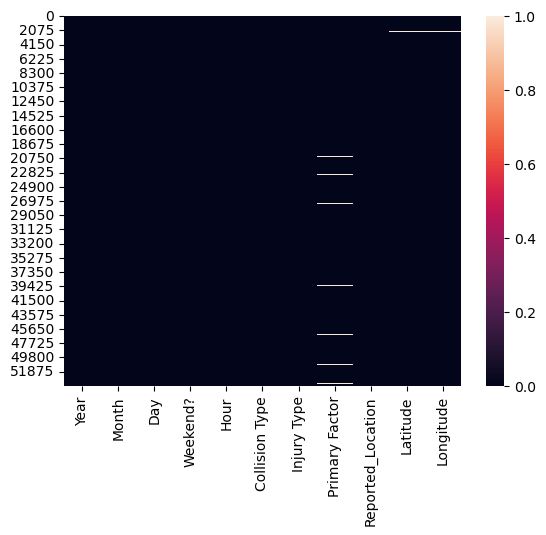

In [10]:
sns.heatmap(car.isna())

In [11]:
car.duplicated().any()

True

In [12]:
car.duplicated().sum()

64

- there are 64 duplicate values

## HANDLING MISSING VALUES

In [13]:
car['Weekend?'].fillna(car["Weekend?"].mode()[0],inplace=True)

In [14]:
car["Weekend?"].mode()[0]

'Weekday'

This fills the missing values in the "Weekend?" column with the most frequent value, and the inplace=True parameter modifies the original DataFrame (car) in place.

In [15]:
car['Hour'].fillna(car['Hour'].median(),inplace=True)

This fills the missing values in the "Hour" column with the median value, and the inplace=True parameter modifies the original DataFrame (car) in place.

In [16]:
car['Collision Type'].fillna('Unknown', inplace=True)
car['Primary Factor'].fillna('Unknown', inplace=True)
car['Reported_Location'].fillna('Unknown', inplace=True)

This fills the missing values in the "Collision Type" , 'Primary Factor' , 'Reported_Location' column with the unknown, and the inplace=True parameter modifies the original DataFrame (car) in place.

In [17]:
car['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
car['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

This fills the missing values in the 'Latitude' , 'Longitude' column with the mean value, and the inplace=True parameter modifies the original DataFrame (car) in place.

In [18]:
car.isna().sum()

Year                 0
Month                0
Day                  0
Weekend?             0
Hour                 0
Collision Type       0
Injury Type          0
Primary Factor       0
Reported_Location    0
Latitude             0
Longitude            0
dtype: int64

- now all the missing values have been filled

## EXPLORATORY DATA ANALYSIS

In [19]:
print("    CAR CRASH ANALYSIS    ".title())
print("--------------------------------")
print("The number of unique years: ", df["Year"].nunique())
print("The number of unique months: ", df["Month"].nunique())
print("The number of unique days: ", df["Day"].nunique())
print("The number of unique weekend/weekday categories: ", df["Weekend?"].nunique())
print("The number of unique hours: ", df["Hour"].nunique())
print("The number of unique collision types: ", df["Collision Type"].nunique())
print("The number of unique injury types: ", df["Injury Type"].nunique())
print("The number of unique primary factors: ", df["Primary Factor"].nunique())
print("The number of unique reported locations: ", df["Reported_Location"].nunique())
print("The number of unique latitude values: ", df["Latitude"].nunique())
print("The number of unique longitude values: ", df["Longitude"].nunique())

    Car Crash Analysis    
--------------------------------
The number of unique years:  13
The number of unique months:  12
The number of unique days:  7
The number of unique weekend/weekday categories:  2
The number of unique hours:  24
The number of unique collision types:  7
The number of unique injury types:  4
The number of unique primary factors:  55
The number of unique reported locations:  19364
The number of unique latitude values:  15370
The number of unique longitude values:  16068


## DESCRIPTIVE ANALYSIS

In [20]:
car.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,53943.0,NaN,NaN,NaN,2008.968059,3.78976,2003.0,2006.0,2009.0,2012.0,2015.0
Month,53943.0,NaN,NaN,NaN,6.662162,3.51463,1.0,4.0,7.0,10.0,12.0
Day,53943.0,NaN,NaN,NaN,4.196912,1.90944,1.0,3.0,4.0,6.0,7.0
Weekend?,53943,2,Weekday,40672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,53943.0,NaN,NaN,NaN,1347.485309,530.554963,0.0,1000.0,1400.0,1700.0,2300.0
Collision Type,53943,8,2-Car,37606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Injury Type,53943,4,No injury/unknown,41603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Factor,53943,56,FAILURE TO YIELD RIGHT OF WAY,11193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reported_Location,53943,19365,E 3RD ST,375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,53943.0,NaN,NaN,NaN,35.582109,11.286744,0.0,39.142048,39.16443,39.173344,41.228665


- The data spans from 2003 to 2015.
- The data covers all months of the year.
- The distribution is relatively uniform, with slightly higher frequency in the summer months (June to August).
- Days of the month are spread across the range, indicating a diverse dataset.
- There are two unique categories: "Weekday" and "Weekend."
- The majority of the recorded entries are for weekdays.
- The data includes a range of hours throughout the day.
- There are seven unique collision types.
- The most common collision type is "2-Car."
- Four unique injury types are recorded.
- The most frequent category is "No injury/unknown."
- There are 55 unique primary factors contributing to the crashes.
- The most common primary factor is "FAILURE TO YIELD RIGHT OF WAY."
- There are 19,364 unique reported locations.
- The most frequently reported location is "E 3RD ST."
- Latitude values range from 0.0 to 41.23, with a mean of approximately 35.58.
- Longitude values range from -88.96 to -86.51, with a mean of approximately -78.62.

## UNIVARIABLE ANALYSIS

In [21]:
car.columns

Index(['Year', 'Month', 'Day', 'Weekend?', 'Hour', 'Collision Type',
       'Injury Type', 'Primary Factor', 'Reported_Location', 'Latitude',
       'Longitude'],
      dtype='object')

### Analysis for 'Year'

In [22]:
year_counts=car['Year'].value_counts()
year_counts

2003    4625
2008    4341
2015    4313
2004    4269
2012    4223
2014    4167
2010    4060
2013    4058
2007    4055
2009    4014
2005    3967
2006    3937
2011    3914
Name: Year, dtype: int64

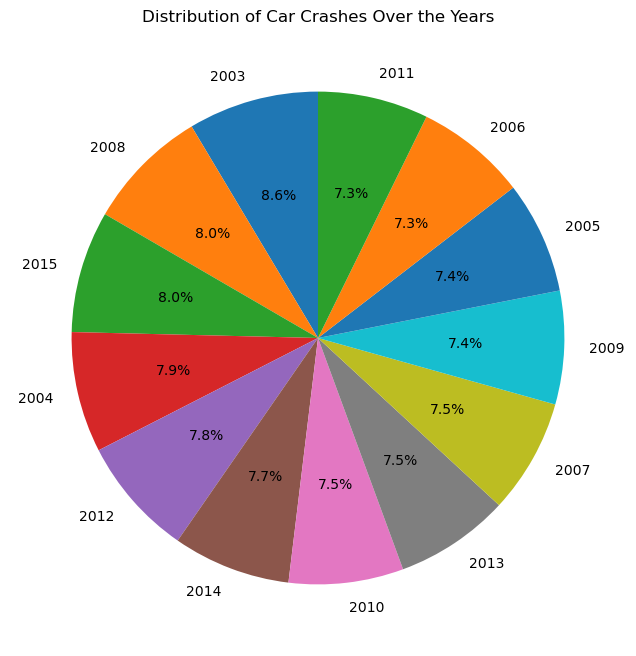

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(year_counts,labels=year_counts.index,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Car Crashes Over the Years')
plt.show()

- The dataset spans from 2003 to 2015.
- The year 2003 has the highest count of car crashes (4625), indicating a significant number of incidents in that year.
- Other years with relatively high counts include 2008 (4341), 2015 (4313), and 2004 (4269).
- The analysis shows a general trend of fluctuating car crashes over time, with peaks in 2003, 2008, and 2015 suggesting potential factors influencing road safety. Further analysis may reveal temporal patterns and explore lower-counting years for specific reasons.

### Analysis for 'Month'

In [24]:
car['Month'].value_counts()

10    5581
9     4994
11    4884
1     4665
12    4598
4     4574
2     4541
8     4480
5     4212
3     3842
7     3820
6     3752
Name: Month, dtype: int64

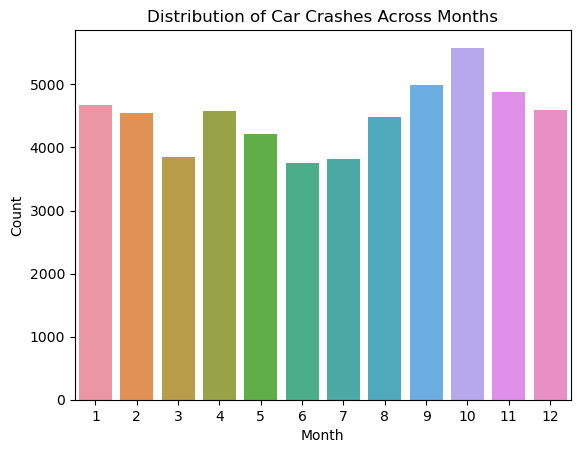

In [25]:
sns.countplot(x='Month', data=car)
plt.title('Distribution of Car Crashes Across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Monthly Distribution:

- The highest number of car crashes occurs in October (Month 10) with a count of 5581 incidents followeb by September (Month 9) and November (Month 11).
- October, September, and November fall within the autumn season in the Northern Hemisphere. The higher counts in these months may suggest potential seasonal patterns or factors influencing road safety during this time.
- The months with the lowest counts are June (Month 6) and May (Month 5).

### Analysis for 'Day'

In [26]:
day_counts = car['Day'].value_counts()
day_counts

6    9680
3    8133
5    8122
4    7880
2    7473
7    7364
1    5291
Name: Day, dtype: int64

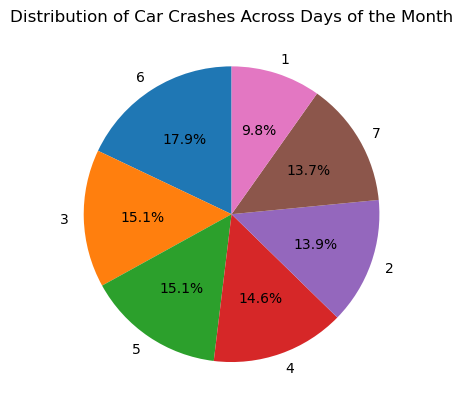

In [27]:
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Car Crashes Across Days of the Month')
plt.show()

- The distribution of car crashes across days suggests variations in incidents throughout the month.
- The highest number of car crashes occurs on the 6th day of the month, with a count of 9680 incidents.
- Other days with relatively high counts include the 3rd, 5th, and 4th days of the month.
- Days like the 1st, 2nd, and 7th have comparatively lower counts.

### Analysis for "Weekend"

In [28]:
car['Weekend?'].value_counts()

Weekday    40672
Weekend    13271
Name: Weekend?, dtype: int64

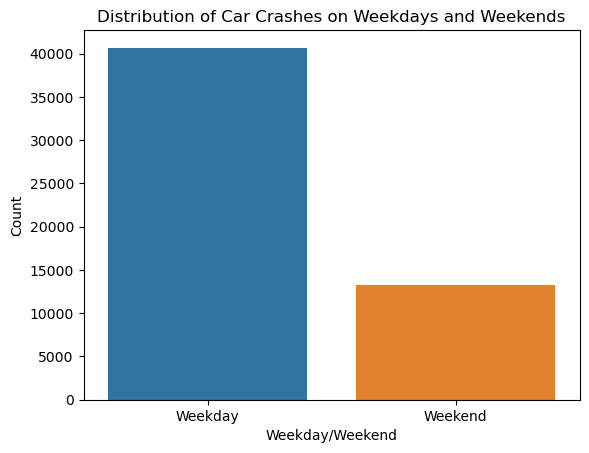

In [29]:
sns.countplot(x="Weekend?",data=car)
plt.title('Distribution of Car Crashes on Weekdays and Weekends')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Count')
plt.show()

- The majority of car crashes in the dataset occurred on weekdays, with a count of 40,672.The higher count of car crashes on weekdays suggests that weekdays might be associated with higher traffic volumes or commuting to work, school, or other regular weekday activities may contribute to the higher incidence of car crashes during weekdays.
- On weekends, there were fewer car crashes, with a count of 13,271.These could include factors like recreational activities, events, or different driving behaviors on weekends.

### Analysis for "Hour"

In [30]:
car['Hour'].value_counts()

1700.0    4631
1600.0    4488
1500.0    4283
1400.0    3975
1200.0    3819
1300.0    3526
1800.0    3232
1100.0    3040
1900.0    2442
1000.0    2360
900.0     2318
800.0     2247
700.0     2031
2000.0    1918
2100.0    1794
2200.0    1503
2300.0    1187
0.0       1115
600.0      806
100.0      801
300.0      719
200.0      716
500.0      514
400.0      478
Name: Hour, dtype: int64

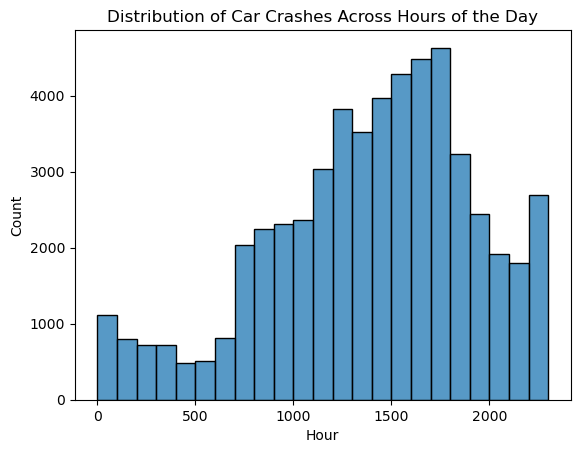

In [31]:
sns.histplot(car['Hour'], bins=range(0, 2400, 100), kde=False)
plt.title('Distribution of Car Crashes Across Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

- The time intervals 1600-1700, 1500-1600, and 1400-1500 have the highest counts, suggesting that car crashes are more frequent during these hours.
- The intervals from 1000 to 1700 show higher counts, indicating increased car crash activity during daytime hours.
- The intervals from 1700 to 1900 still show notable car crash activity, likely during the evening rush hours.
- The intervals 2300-2400 and 0-100 have lower or zero counts, possibly indicating fewer car crashes during late night or very early morning hours.
- There is an interval 2300-2400 with a count of 0, which could be either an absence of data or a period with no recorded car crashes.

### Analysis for 'Collision Type'

In [33]:
car['Collision Type'].value_counts()

2-Car               37606
1-Car               10245
3+ Cars              3152
Moped/Motorcycle     1007
Bus                   850
Pedestrian            609
Cyclist               468
Unknown                 6
Name: Collision Type, dtype: int64

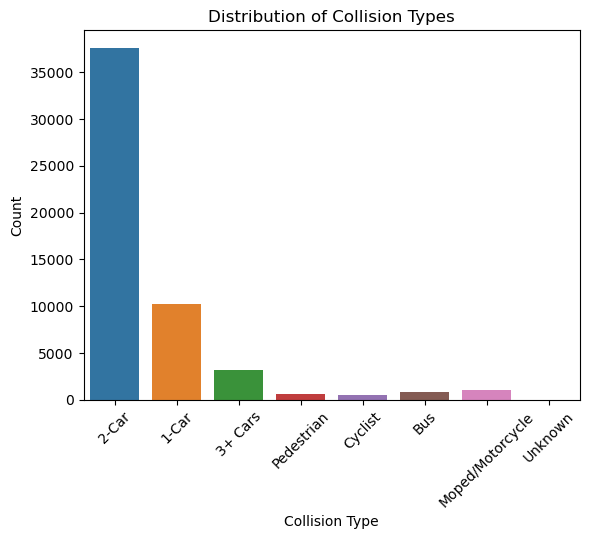

In [34]:
sns.countplot(x='Collision Type', data=car)
plt.title('Distribution of Collision Types')
plt.xlabel('Collision Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- 2-Car collisions are predominant in the dataset (37,606 incidents).
- 1-Car collisions are the second most common, with a count of 10,245 incidents.These might include single-vehicle accidents.
- There are 3,152 incidents involving three or more cars in a collision.
- Moped/Motorcycle collisions account for 1,007 incidents.
- Bus collisions are recorded in 850 incidents.
- Pedestrian-involved collisions are documented in 609 incidents.
- Collisions involving cyclists are observed in 468 incidents.
- There are only 6 incidents labeled as "Unknown" collision types.

### Analysis for 'Injury Type'

In [35]:
car['Injury Type'].value_counts()

No injury/unknown     41603
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: Injury Type, dtype: int64

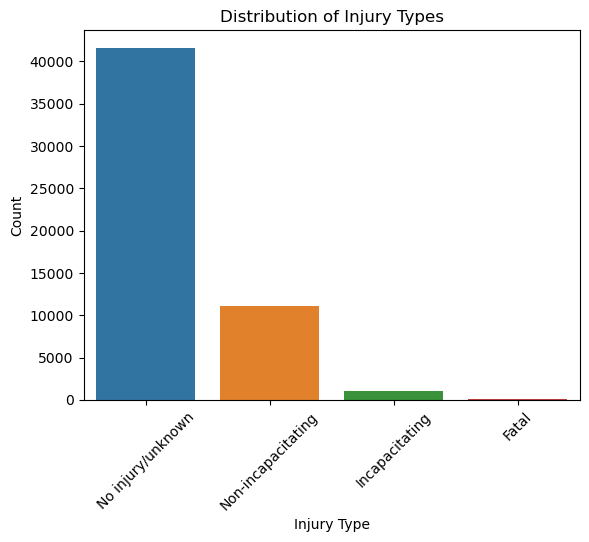

In [36]:
sns.countplot(x='Injury Type', data=car)
plt.title('Distribution of Injury Types')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The majority of recorded car crashes result in no reported injuries or injuries categorized as "unknown."
- Non-incapacitating injuries are relatively common, indicating incidents where injuries are noticeable but not severe enough to cause incapacity.
- Incapacitating injuries are less frequent but still significant, signifying a subset of incidents with more severe consequences.
- Fatal injuries are the least common outcome, representing a small fraction of the overall dataset but indicating the most severe consequences.

### Analysis for 'Primary Factor'

In [37]:
car['Primary Factor'].value_counts()

FAILURE TO YIELD RIGHT OF WAY               11193
FOLLOWING TOO CLOSELY                        7359
OTHER (DRIVER) - EXPLAIN IN NARRATIVE        6158
UNSAFE BACKING                               5188
RAN OFF ROAD RIGHT                           2925
DISREGARD SIGNAL/REG SIGN                    2206
SPEED TOO FAST FOR WEATHER CONDITIONS        1921
IMPROPER TURNING                             1843
ANIMAL/OBJECT IN ROADWAY                     1688
DRIVER DISTRACTED - EXPLAIN IN NARRATIVE     1656
UNSAFE SPEED                                 1499
ROADWAY SURFACE CONDITION                    1270
Unknown                                      1121
LEFT OF CENTER                               1078
IMPROPER LANE USAGE                           985
ALCOHOLIC BEVERAGES                           805
UNSAFE LANE MOVEMENT                          756
OVERCORRECTING/OVERSTEERING                   597
IMPROPER PASSING                              496
OTHER (VEHICLE) - EXPLAIN IN NARRATIVE        472


In [38]:
top_10_factors = car['Primary Factor'].value_counts().nlargest(10)

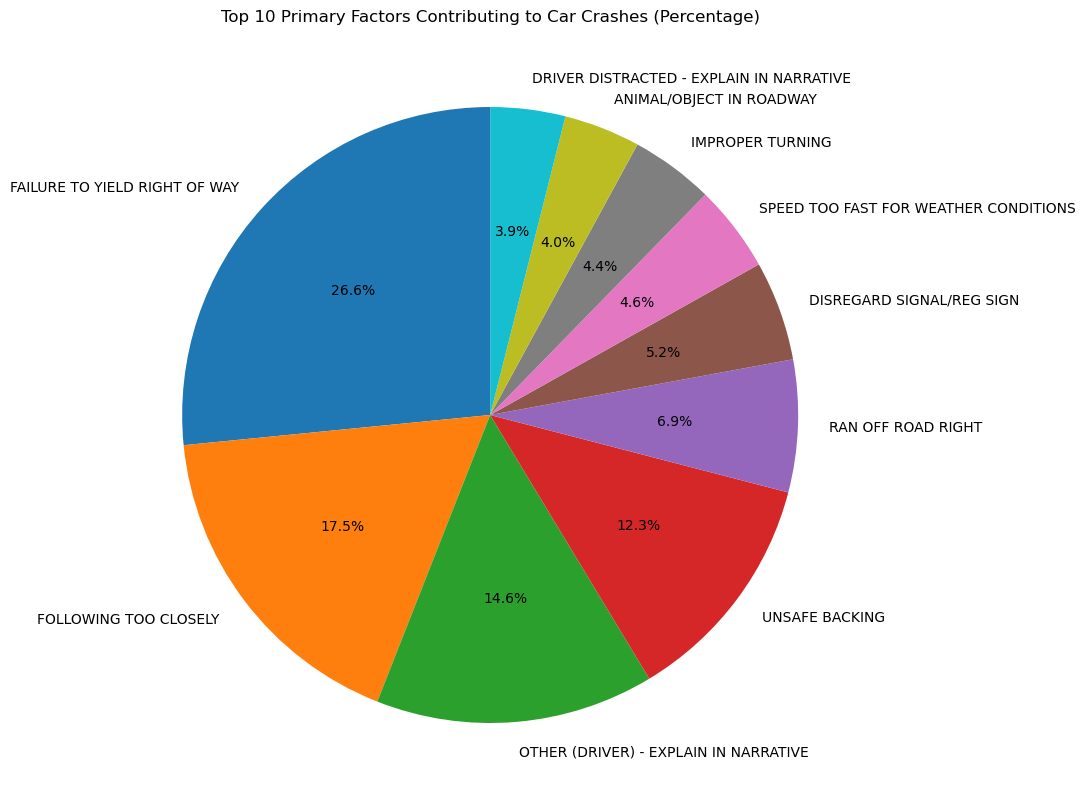

In [39]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_factors, labels=top_10_factors.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Primary Factors Contributing to Car Crashes (Percentage)')
plt.show()


- The dataset includes a diverse range of contributing factors, covering various aspects such as driver behavior, road conditions, vehicle issues, distractions, and environmental factors.
- The top three contributing factors are:FAILURE TO YIELD RIGHT OF WAY (11193 cases),FOLLOWING TOO CLOSELY (7359 cases),OTHER (DRIVER) - EXPLAIN IN NARRATIVE (6158 cases)
- Other common contributing factors include UNSAFE BACKING, RAN OFF ROAD RIGHT, DISREGARD SIGNAL/REG SIGN, and SPEED TOO FAST FOR WEATHER CONDITIONS.
- Some factors have relatively fewer occurrences, such as VIOLATION OF LICENSE RESTRICTION, SHOULDER DEFECTIVE, SEVERE CROSSWINDS, and UTILITY WORK.

### Analysis for 'Reported_Location'

In [40]:
car['Reported_Location'].value_counts()

E 3RD ST                         375
W 3RD ST                         222
SR37N & VERNAL                   197
3RD ST                           195
S WALNUT ST                      172
                                ... 
GARRISON CHAPEL RD & TRENDMAR      1
GOODNIGHT & S CLARIZZ BLVD         1
ADAIR & PLEASANT RIDGE RD          1
BRIGHTON CRST & SMITH              1
MONROW & THIRD ST                  1
Name: Reported_Location, Length: 19365, dtype: int64

In [41]:
top_locations = car['Reported_Location'].value_counts().nlargest(10)

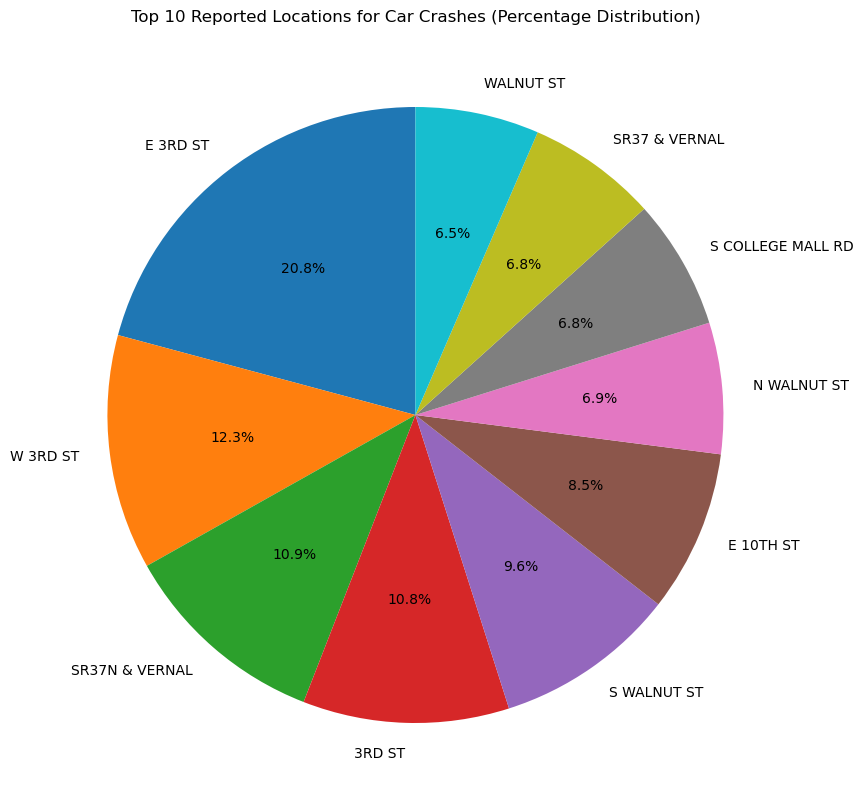

In [42]:
plt.figure(figsize=(10, 10))
plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Reported Locations for Car Crashes (Percentage Distribution)')
plt.show()


- The most frequently reported location for car crashes is "E 3RD ST" with 375 occurrences followed by "W 3RD ST" (222 occurrences), "SR37N & VERNAL" (197 occurrences), and "3RD ST" (195 occurrences).
- There are a variety of reported locations with varying frequencies, suggesting that car crashes are distributed across different areas.
- There is at least one entry with an empty string as the reported location ("MONROW & THIRD ST").

## MULTIVARIATE ANALYSIS

In [43]:
car.corr()

,Year,Month,Day,Hour,Latitude,Longitude
Year,1.000000,-0.000574,-0.005981,-0.020789,0.067601,-0.067474
Month,-0.000574,1.000000,-0.010286,0.012932,-0.016485,0.016591
Day,-0.005981,-0.010286,1.000000,0.008204,0.004315,-0.004442
Hour,-0.020789,0.012932,0.008204,1.000000,0.006893,-0.006879
Latitude,0.067601,-0.016485,0.004315,0.006893,1.000000,-0.999409
Longitude,-0.067474,0.016591,-0.004442,-0.006879,-0.999409,1.000000


<Axes: >

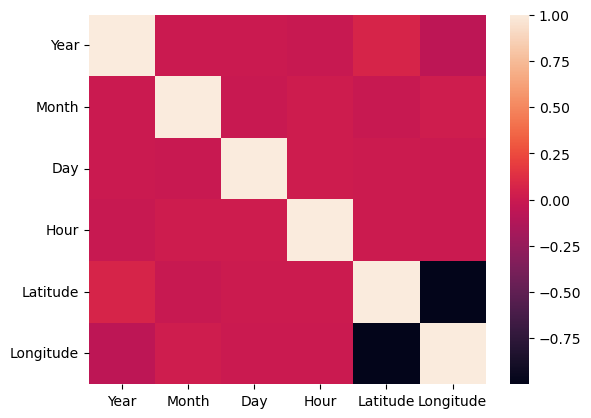

In [44]:
sns.heatmap(car.corr())

- There is a strong negative correlation (-0.999409) between Latitude and Longitude. This suggests that as Latitude increases, Longitude decreases, and vice versa.
- There is a small negative correlation (-0.016485) between Month and Latitude.
- There is no strong correlation between Day and Hour (correlation coefficient is relatively small at 0.008204).
- There is a small negative correlation (-0.020789) between Year and Hour.
- The correlation between Latitude and Hour is very small (0.006893).
- The correlation between Longitude and Hour is very small (-0.006879).

## CONCLUSIONS:

Temporal Trends:

The dataset spans from 2003 to 2015, with notable variations in car crash counts over the years. The year 2003 has the highest count of car crashes, followed by 2008 and 2015. There is a general trend of fluctuating car crashes over time, suggesting potential factors influencing road safety. Monthly Distribution:

October has the highest number of car crashes, followed by September and November. The distribution across months shows potential seasonal patterns, with higher counts in autumn months (October, September, November). June and May have the lowest car crash counts. Daywise Analysis:

The distribution of car crashes across days indicates variations throughout the month. The 6th day of the month has the highest number of car crashes. Days 3, 5, and 4 also have relatively high counts. Weekday vs. Weekend:

The majority of car crashes occur on weekdays, with higher counts on weekdays compared to weekends. Weekdays may be associated with higher traffic volumes or regular activities contributing to increased car crashes. Hourly Analysis:

The time intervals 1600-1700, 1500-1600, and 1400-1500 have the highest counts, indicating increased car crash activity during these hours. Daytime hours (1000-1700) show higher counts, while late-night hours (2300-2400, 0-100) have lower or zero counts. Collision Types:

2-Car collisions are the most common, followed by 1-Car collisions and incidents involving three or more cars. Moped/Motorcycle collisions, bus collisions, and incidents involving pedestrians and cyclists are also recorded. Injury Types:

The majority of car crashes result in no reported injuries or injuries categorized as "unknown." Non-incapacitating injuries are relatively common, while incapacitating injuries and fatal injuries are less frequent. Primary Factors:

The dataset includes a diverse range of contributing factors, such as failure to yield right of way, following too closely, and other driver-related issues. There are 55 unique primary factors, with varying frequencies. Reported Locations:

The most frequently reported location for car crashes is "E 3RD ST," followed by "W 3RD ST" and other locations with varying frequencies. Some entries have empty string reported locations. Spatial Relationships:

There is a strong negative correlation between Latitude and Longitude, indicating a clear spatial relationship in the dataset.